In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

from astropy.io import fits
import scipy.stats.distributions as dist
from matplotlib.colors import LogNorm
from illustris_python import illustris_python as il
import sys
sys.path.append('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/')
from CNN_execute_script_v2 import *
from tensorflow import keras
from sklearn.metrics import auc
import os
sys.path.append('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/')
from cnn_tools import *

In [2]:
CNN_csv = 'CNN_info_V4.parquet'
CNN_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/'
real_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/REAL_FITS_11_04v2_dir/'
df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
objects_df = pd.read_parquet(df_dir + 'objects_master_neighbours_morph_22_12_13_v2.parquet')
cnn_run_table = pd.read_parquet(CNN_dir + CNN_csv)
scale_factor = pd.read_parquet('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/scale_factor.parquet')

# View run table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(cnn_run_table.sort_values('accuracy', ascending=False)[:50])
    print(cnn_run_table[-50:])
#cnn_run_table.sort_values('accuracy', ascending=False)[:50]

     RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
564     640       100         50  0.392392   0.219219  0.790324  0.766244   
565     639       100         50  0.477477   0.323323  0.774013  0.760337   
566     641       100         50  0.537538   0.362362  0.825516  0.821868   
567     642       100         50  0.529530   0.504505  0.705432  0.721276   
568     643       100         50  0.442442   0.281281  0.752666  0.733041   
569     644       100         50  0.416416   0.302302  0.784001  0.762618   
570     646       100         50  0.376376   0.289289  0.788084  0.767007   
571     645       100         50  0.577578   0.394394  0.777430  0.785581   
572     647       100         50  0.434434   0.269269  0.789587  0.757370   
573     649       100         50  0.444444   0.262262  0.809182  0.762618   
574     648       100         50  0.559560   0.415415  0.766217  0.765531   
575     650       100         50  0.437437   0.280280  0.798265  0.769011   

In [ ]:
#save_avg_results(474,0.78)
#load_avg_results(229)
results_list = load_avg_results([474])

In [4]:
objects_premergers = pd.read_parquet('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers//DF_dir/objects_with_premergers_full.parquet')

In [5]:
for results in results_list:
    results['dt_until_merger'] = np.NaN
    for idx, row in results.iterrows():
        print(idx, '/', len(results))
        object_ = objects_premergers.loc[(objects_premergers['SFID'] == row.SFID) & (objects_premergers['SnapNum'] == row.SnapNum)]
        results['dt_until_merger'][idx] = object_['dt_until_merger']

0 / 5889
1 / 5889
2 / 5889
3 / 5889
4 / 5889
5 / 5889
6 / 5889
7 / 5889
8 / 5889
9 / 5889
10 / 5889
11 / 5889
12 / 5889
13 / 5889
14 / 5889
15 / 5889
16 / 5889
17 / 5889
18 / 5889
19 / 5889
20 / 5889
21 / 5889
22 / 5889
23 / 5889
24 / 5889
25 / 5889
26 / 5889
27 / 5889
28 / 5889
29 / 5889
30 / 5889
31 / 5889
32 / 5889
33 / 5889
34 / 5889
35 / 5889
36 / 5889
37 / 5889
38 / 5889
39 / 5889
40 / 5889
41 / 5889
42 / 5889
43 / 5889
44 / 5889
45 / 5889
46 / 5889
47 / 5889
48 / 5889
49 / 5889
50 / 5889
51 / 5889
52 / 5889
53 / 5889
54 / 5889
55 / 5889
56 / 5889
57 / 5889
58 / 5889
59 / 5889
60 / 5889
61 / 5889
62 / 5889
63 / 5889
64 / 5889
65 / 5889
66 / 5889
67 / 5889
68 / 5889
69 / 5889
70 / 5889
71 / 5889
72 / 5889
73 / 5889
74 / 5889
75 / 5889
76 / 5889
77 / 5889
78 / 5889
79 / 5889
80 / 5889
81 / 5889
82 / 5889
83 / 5889
84 / 5889
85 / 5889
86 / 5889
87 / 5889
88 / 5889
89 / 5889
90 / 5889
91 / 5889
92 / 5889
93 / 5889
94 / 5889
95 / 5889
96 / 5889
97 / 5889
98 / 5889
99 / 5889
100 / 5889

762 / 5889
763 / 5889
764 / 5889
765 / 5889
766 / 5889
767 / 5889
768 / 5889
769 / 5889
770 / 5889
771 / 5889
772 / 5889
773 / 5889
774 / 5889
775 / 5889
776 / 5889
777 / 5889
778 / 5889
779 / 5889
780 / 5889
781 / 5889
782 / 5889
783 / 5889
784 / 5889
785 / 5889
786 / 5889
787 / 5889
788 / 5889
789 / 5889
790 / 5889
791 / 5889
792 / 5889
793 / 5889
794 / 5889
795 / 5889
796 / 5889
797 / 5889
798 / 5889
799 / 5889
800 / 5889
801 / 5889
802 / 5889
803 / 5889
804 / 5889
805 / 5889
806 / 5889
807 / 5889
808 / 5889
809 / 5889
810 / 5889
811 / 5889
812 / 5889
813 / 5889
814 / 5889
815 / 5889
816 / 5889
817 / 5889
818 / 5889
819 / 5889
820 / 5889
821 / 5889
822 / 5889
823 / 5889
824 / 5889
825 / 5889
826 / 5889
827 / 5889
828 / 5889
829 / 5889
830 / 5889
831 / 5889
832 / 5889
833 / 5889
834 / 5889
835 / 5889
836 / 5889
837 / 5889
838 / 5889
839 / 5889
840 / 5889
841 / 5889
842 / 5889
843 / 5889
844 / 5889
845 / 5889
846 / 5889
847 / 5889
848 / 5889
849 / 5889
850 / 5889
851 / 5889
852 / 5889

1479 / 5889
1480 / 5889
1481 / 5889
1482 / 5889
1483 / 5889
1484 / 5889
1485 / 5889
1486 / 5889
1487 / 5889
1488 / 5889
1489 / 5889
1490 / 5889
1491 / 5889
1492 / 5889
1493 / 5889
1494 / 5889
1495 / 5889
1496 / 5889
1497 / 5889
1498 / 5889
1499 / 5889
1500 / 5889
1501 / 5889
1502 / 5889
1503 / 5889
1504 / 5889
1505 / 5889
1506 / 5889
1507 / 5889
1508 / 5889
1509 / 5889
1510 / 5889
1511 / 5889
1512 / 5889
1513 / 5889
1514 / 5889
1515 / 5889
1516 / 5889
1517 / 5889
1518 / 5889
1519 / 5889
1520 / 5889
1521 / 5889
1522 / 5889
1523 / 5889
1524 / 5889
1525 / 5889
1526 / 5889
1527 / 5889
1528 / 5889
1529 / 5889
1530 / 5889
1531 / 5889
1532 / 5889
1533 / 5889
1534 / 5889
1535 / 5889
1536 / 5889
1537 / 5889
1538 / 5889
1539 / 5889
1540 / 5889
1541 / 5889
1542 / 5889
1543 / 5889
1544 / 5889
1545 / 5889
1546 / 5889
1547 / 5889
1548 / 5889
1549 / 5889
1550 / 5889
1551 / 5889
1552 / 5889
1553 / 5889
1554 / 5889
1555 / 5889
1556 / 5889
1557 / 5889
1558 / 5889
1559 / 5889
1560 / 5889
1561 / 5889
1562

2171 / 5889
2172 / 5889
2173 / 5889
2174 / 5889
2175 / 5889
2176 / 5889
2177 / 5889
2178 / 5889
2179 / 5889
2180 / 5889
2181 / 5889
2182 / 5889
2183 / 5889
2184 / 5889
2185 / 5889
2186 / 5889
2187 / 5889
2188 / 5889
2189 / 5889
2190 / 5889
2191 / 5889
2192 / 5889
2193 / 5889
2194 / 5889
2195 / 5889
2196 / 5889
2197 / 5889
2198 / 5889
2199 / 5889
2200 / 5889
2201 / 5889
2202 / 5889
2203 / 5889
2204 / 5889
2205 / 5889
2206 / 5889
2207 / 5889
2208 / 5889
2209 / 5889
2210 / 5889
2211 / 5889
2212 / 5889
2213 / 5889
2214 / 5889
2215 / 5889
2216 / 5889
2217 / 5889
2218 / 5889
2219 / 5889
2220 / 5889
2221 / 5889
2222 / 5889
2223 / 5889
2224 / 5889
2225 / 5889
2226 / 5889
2227 / 5889
2228 / 5889
2229 / 5889
2230 / 5889
2231 / 5889
2232 / 5889
2233 / 5889
2234 / 5889
2235 / 5889
2236 / 5889
2237 / 5889
2238 / 5889
2239 / 5889
2240 / 5889
2241 / 5889
2242 / 5889
2243 / 5889
2244 / 5889
2245 / 5889
2246 / 5889
2247 / 5889
2248 / 5889
2249 / 5889
2250 / 5889
2251 / 5889
2252 / 5889
2253 / 5889
2254

2870 / 5889
2871 / 5889
2872 / 5889
2873 / 5889
2874 / 5889
2875 / 5889
2876 / 5889
2877 / 5889
2878 / 5889
2879 / 5889
2880 / 5889
2881 / 5889
2882 / 5889
2883 / 5889
2884 / 5889
2885 / 5889
2886 / 5889
2887 / 5889
2888 / 5889
2889 / 5889
2890 / 5889
2891 / 5889
2892 / 5889
2893 / 5889
2894 / 5889
2895 / 5889
2896 / 5889
2897 / 5889
2898 / 5889
2899 / 5889
2900 / 5889
2901 / 5889
2902 / 5889
2903 / 5889
2904 / 5889
2905 / 5889
2906 / 5889
2907 / 5889
2908 / 5889
2909 / 5889
2910 / 5889
2911 / 5889
2912 / 5889
2913 / 5889
2914 / 5889
2915 / 5889
2916 / 5889
2917 / 5889
2918 / 5889
2919 / 5889
2920 / 5889
2921 / 5889
2922 / 5889
2923 / 5889
2924 / 5889
2925 / 5889
2926 / 5889
2927 / 5889
2928 / 5889
2929 / 5889
2930 / 5889
2931 / 5889
2932 / 5889
2933 / 5889
2934 / 5889
2935 / 5889
2936 / 5889
2937 / 5889
2938 / 5889
2939 / 5889
2940 / 5889
2941 / 5889
2942 / 5889
2943 / 5889
2944 / 5889
2945 / 5889
2946 / 5889
2947 / 5889
2948 / 5889
2949 / 5889
2950 / 5889
2951 / 5889
2952 / 5889
2953

3566 / 5889
3567 / 5889
3568 / 5889
3569 / 5889
3570 / 5889
3571 / 5889
3572 / 5889
3573 / 5889
3574 / 5889
3575 / 5889
3576 / 5889
3577 / 5889
3578 / 5889
3579 / 5889
3580 / 5889
3581 / 5889
3582 / 5889
3583 / 5889
3584 / 5889
3585 / 5889
3586 / 5889
3587 / 5889
3588 / 5889
3589 / 5889
3590 / 5889
3591 / 5889
3592 / 5889
3593 / 5889
3594 / 5889
3595 / 5889
3596 / 5889
3597 / 5889
3598 / 5889
3599 / 5889
3600 / 5889
3601 / 5889
3602 / 5889
3603 / 5889
3604 / 5889
3605 / 5889
3606 / 5889
3607 / 5889
3608 / 5889
3609 / 5889
3610 / 5889
3611 / 5889
3612 / 5889
3613 / 5889
3614 / 5889
3615 / 5889
3616 / 5889
3617 / 5889
3618 / 5889
3619 / 5889
3620 / 5889
3621 / 5889
3622 / 5889
3623 / 5889
3624 / 5889
3625 / 5889
3626 / 5889
3627 / 5889
3628 / 5889
3629 / 5889
3630 / 5889
3631 / 5889
3632 / 5889
3633 / 5889
3634 / 5889
3635 / 5889
3636 / 5889
3637 / 5889
3638 / 5889
3639 / 5889
3640 / 5889
3641 / 5889
3642 / 5889
3643 / 5889
3644 / 5889
3645 / 5889
3646 / 5889
3647 / 5889
3648 / 5889
3649

4253 / 5889
4254 / 5889
4255 / 5889
4256 / 5889
4257 / 5889
4258 / 5889
4259 / 5889
4260 / 5889
4261 / 5889
4262 / 5889
4263 / 5889
4264 / 5889
4265 / 5889
4266 / 5889
4267 / 5889
4268 / 5889
4269 / 5889
4270 / 5889
4271 / 5889
4272 / 5889
4273 / 5889
4274 / 5889
4275 / 5889
4276 / 5889
4277 / 5889
4278 / 5889
4279 / 5889
4280 / 5889
4281 / 5889
4282 / 5889
4283 / 5889
4284 / 5889
4285 / 5889
4286 / 5889
4287 / 5889
4288 / 5889
4289 / 5889
4290 / 5889
4291 / 5889
4292 / 5889
4293 / 5889
4294 / 5889
4295 / 5889
4296 / 5889
4297 / 5889
4298 / 5889
4299 / 5889
4300 / 5889
4301 / 5889
4302 / 5889
4303 / 5889
4304 / 5889
4305 / 5889
4306 / 5889
4307 / 5889
4308 / 5889
4309 / 5889
4310 / 5889
4311 / 5889
4312 / 5889
4313 / 5889
4314 / 5889
4315 / 5889
4316 / 5889
4317 / 5889
4318 / 5889
4319 / 5889
4320 / 5889
4321 / 5889
4322 / 5889
4323 / 5889
4324 / 5889
4325 / 5889
4326 / 5889
4327 / 5889
4328 / 5889
4329 / 5889
4330 / 5889
4331 / 5889
4332 / 5889
4333 / 5889
4334 / 5889
4335 / 5889
4336

KeyboardInterrupt: 

In [54]:
results = results_list[0]
#results['dt_until_merger'][0] == NaN
#results
results_M_total = np.log10(results.loc[results['LABEL'] == 1]['dt_until_merger'].values)
results_M_total = results_M_total[~np.isnan(results_M_total)]
results_M_total

array([-0.81815641, -0.83564714, -0.82102305, -0.82681373, -1.06048075,
       -0.8068754 , -0.80134291, -0.81247928, -0.8068754 , -0.81247928,
       -0.80134291, -0.79048499, -0.79860288, -0.83564714, -0.67985371,
       -0.84771166, -0.67985371, -0.82973828, -0.84771166, -0.81815641,
       -0.82973828, -0.75945075, -0.67985371, -0.80134291, -0.82102305,
       -0.86646109, -0.77469072, -0.82973828, -0.83564714, -0.78515615,
       -0.79048499, -0.84771166, -0.86646109, -0.77469072, -0.86966623,
       -0.84771166, -0.79048499, -1.06048075, -0.84771166, -1.06048075,
       -0.84771166, -0.81247928, -0.86646109, -1.06048075, -0.83564714,
       -0.67985371, -0.78515615, -0.75945075, -0.84771166, -0.84771166,
       -0.86966623, -0.84771166, -0.84771166, -0.81247928, -0.8096683 ,
       -0.78515615, -0.83564714, -0.81247928, -0.77469072, -0.80134291,
       -0.86966623, -0.79048499, -0.81815641, -0.84771166, -0.82973828,
       -0.83564714, -0.77469072, -0.83564714, -0.79860288, -0.67

In [ ]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

In [ ]:
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SFR/Mass' :1e-10, 'r_sep':1, 'S/T' : 1, 'B/T':1, 'HMRad_prop':1, 'r1_prop':1, 'dt_until_merger':1}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass', 'r_sep':'log10(r_sep)', 'S/T':'S/T','B/T':'B/T', 'HMRad_prop':'log10(HMRad)', 'r1_prop':'r1_prop', 'dt_until_merger':'log10(dt_to_merger)'}
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(Boosting and HMrad matching)', 3: '(Boosting and HMrad matching)', 4: '(Boosting + HMrad matching + Higher M cutoff)', 5: '(Boosting + HMrad matching + Higher M cutoff)', 6: '(Boosting + HMrad matching + Higher M cutoff)'}


def plot_multi_results(results_list, params, no_log):
    
    for param in params:
        
        fig = plt.figure(figsize = (15,3 * len(results_list)))
        ax = fig.subplots(len(results_list),2)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][param].values, bins =histedges_equalN(results.loc[results['LABEL'] == 0][param].values, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values, bins = edges_NM, histtype = 'step', label = 'TN')

            else:

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values * scale[param])

                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                
                results_M_total = results_M_total[~np.isnan(results_M_total)]
                results_NM_total = results_NM_total[~np.isnan(results_NM_total)]
                
                counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, histedges_equalN(results_M_total, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                
                #if param == 'dt_until_merger':
                    #counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, bins = 10, histtype = 'step', label = 'Controls')
                #else:
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, histedges_equalN(results_NM_total, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[i,0].hist(results_NM, bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,0].set_title(param + ' distribution')
            ax[i,0].set_ylabel('# counts')
            ax[i,0].set_xlabel(xlabels[param])
            ax[i,0].legend()


            centers = 0.5*(edges[1:]+ edges[:-1])
            centers_NM = 0.5*(edges_NM[1:]+ edges_NM[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            if param != 'dt_until_merger':
                ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[i,1].errorbar(centers_NM, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            
            ax[i,1].set_ylabel('Fraction correctly identified')
            ax[i,1].set_title('Correct fraction binned by ' + param)
            ax[i,1].set_ylim(0, 1.05)
            ax[i,1].set_xlabel(xlabels[param])
            
            ax[i,1].axhline(y = 0.8059, color = 'gray', linestyle='--')
            ax[i,1].legend()

        plt.tight_layout()

In [ ]:
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SFR/Mass' :1e-10, 'r_sep':1, 'S/T' : 1, 'B/T':1, 'HMRad_prop':1, 'r1_prop':1, 'dt_until_merger':1}
xlabels = {'Mstellar' : r'$\log(M_{\ast}/M_{\odot})$', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(R [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass', 'r_sep':'$\log(r_{sep})$', 'S/T':'S/T','B/T':'B/T', 'HMRad_prop':'$\log(R_{1/2} [kpc])$', 'r1_prop':'log(r [kpc])', 'dt_until_merger':'log10(dt_to_merger)'}
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(Boosting and HMrad matching)', 3: '(Boosting and HMrad matching)', 4: '(Boosting + HMrad matching + Higher M cutoff)', 5: '(Boosting + HMrad matching + Higher M cutoff)', 6: '(Boosting + HMrad matching + Higher M cutoff)'}


def plot_multi_results(results_list, params, no_log):
    
    for param in params:
        
        fig = plt.figure(figsize = (7.5,6 * len(results_list)))
        ax = fig.subplots(len(results_list)*2,1)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[2*i].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[2*i].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[2*i].hist(results.loc[results['LABEL'] == 0][param].values, bins =histedges_equalN(results.loc[results['LABEL'] == 0][param].values, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[2*i].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values, bins = edges_NM, histtype = 'step', label = 'TN')

            else:

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values * scale[param])

                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                
                results_M_total = results_M_total[~np.isnan(results_M_total)]
                results_NM_total = results_NM_total[~np.isnan(results_NM_total)]
                
                counts_M_total, edges_M, bars = ax[2*i].hist(results_M_total, histedges_equalN(results_M_total, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[2*i].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                
                #if param == 'dt_until_merger':
                    #counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, bins = 10, histtype = 'step', label = 'Controls')
                #else:
                counts_NM_total, edges_NM, bars = ax[2*i].hist(results_NM_total, histedges_equalN(results_NM_total, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[2*i].hist(results_NM, bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            #ax[2*i].set_title(param + ' distribution')
            ax[2*i].set_ylabel('Frequency')
            ax[2*i].set_xlabel(xlabels[param], size = 13)
            ax[2*i].legend()


            centers = 0.5*(edges[1:]+ edges[:-1])
            centers_NM = 0.5*(edges_NM[1:]+ edges_NM[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            if param != 'dt_until_merger':
                ax[2*i+1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[2*i+1].errorbar(centers_NM, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            
            ax[2*i+1].set_ylabel('Fraction correctly identified', fontname='Times New Roman')
            #ax[2*i+1].set_title('Correct fraction binned by ' + param)
            ax[2*i+1].set_ylim(0, 1.05)
            ax[2*i+1].set_xlabel(xlabels[param], size = 13)
            
            ax[2*i+1].axhline(y = 0.8059, color = 'gray', linestyle='--')
            ax[2*i+1].legend()

        plt.tight_layout()

In [ ]:
import scipy.stats.distributions as dist

# params = ['Mstellar', 'HMRad', 'SFR/Mass', 'Mass/radius**2', 'r_sep','S/T','B/T', 'HMRad_prop']
params = ['Mstellar', 'HMRad', 'SFR/Mass', 'S/T', 'HMRad_prop', 'r_sep', 'r1_prop', 'Redshift']
no_log = ['Redshift', 'ratio_recent', 'Z', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest','GAS_FRAC','S/T','B/T']

plot_multi_results(results_list, params, no_log)

AUC score 0.8868291920486412


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in long_scalars


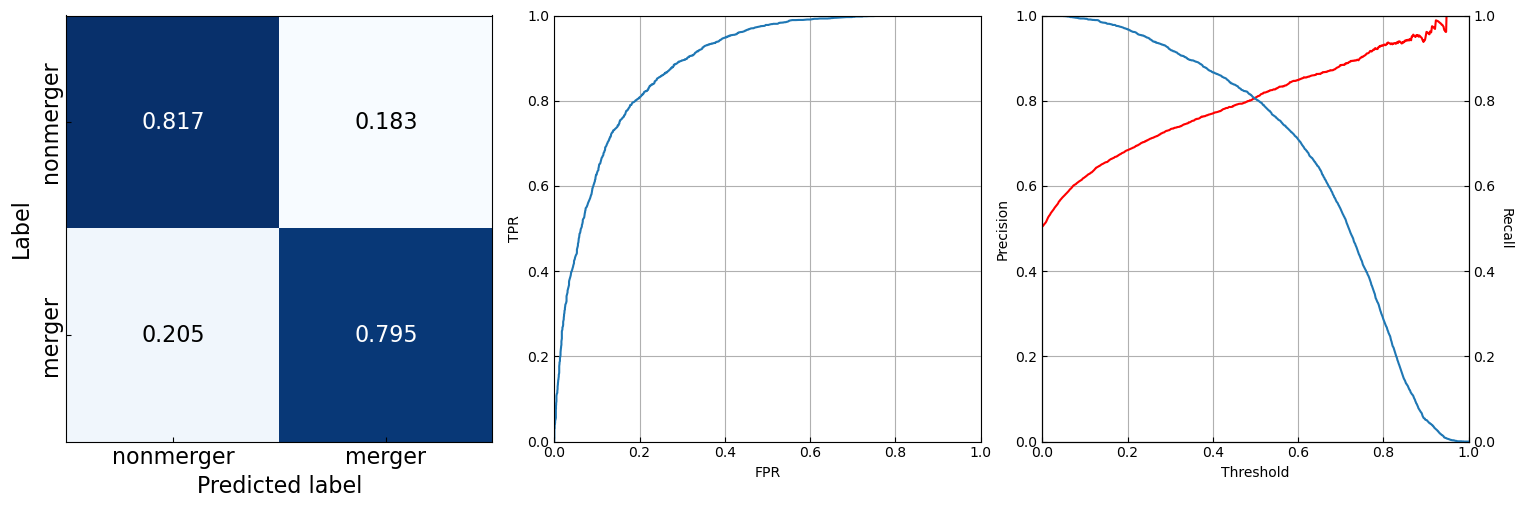

In [20]:
# GENERATE CONFUSION MATRIX
conf_matrix = confusion_matrix(results_list[0]['LABEL'].values, (results_list[0]['PRED_MED'].values > 0.5145145145145145).astype(int), normalize='true')

fig = plt.figure(figsize=(15,5))
ax = fig.subplots(nrows=1, ncols=3)
ax[0].imshow(conf_matrix, cmap='Blues')
for x,y in np.ndindex((2,2)):
    ax[0].text(x, y, '%.3f' %conf_matrix[y,x], 
            c=np.ones(3)*int(conf_matrix[y,x] > 0.5), ha='center', va='center', size=16)

ax[0].set_xlabel('Predicted label', size=16)
ax[0].set_xticks(ticks=range(2),
              labels=['nonmerger', 'merger'])
ax[0].set_ylabel('Label', size=16)
ax[0].set_yticks(ticks=range(2),
              labels=['nonmerger', 'merger'],
              rotation=90, va='center')
ax[0].tick_params(labelsize=16)

#for results_, label in zip([results_list[1], results_list[3]], ['Run 1', 'Run 2']) :
results_ = results_list[0]
    

thresholds = np.linspace(0,1,num=1000)  

pred = results_['PRED_MED'].values
lab = results_['LABEL'].values
tpr = np.array([np.sum(np.logical_and(pred > th, lab == 1)) for th in thresholds])/np.sum(lab)
fpr = np.array([np.sum(np.logical_and(pred > th, lab == 0)) for th in thresholds])/(len(lab) - np.sum(lab))

auc_score = auc(fpr, tpr)
print('AUC score', auc_score)

ax[1].plot(fpr, tpr)

ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
ax[1].grid(True, zorder=1)

fig.tight_layout()

#axp = fig.subplots(nrows=1, ncols=1)
axp = ax[2]
axr = ax[2].twinx()

  

prec = np.array([np.sum(np.logical_and(pred > th, lab == 1))/np.sum(pred > th) for th in thresholds])
rec  = np.array([np.sum(np.logical_and(pred > th, lab == 1)) for th in thresholds])/np.sum(lab)

axp.plot(thresholds, prec, color = 'red', label = 'Precision')
axr.plot(thresholds, rec, label = 'Recall')

axp.set_xlim(0,1)
axp.set_ylim(0,1)
axr.set_ylim(0,1)
axp.set_xlabel('Threshold')
axp.set_ylabel('Precision')
axr.set_ylabel('Recall', rotation=270, va='baseline')

axp.grid(True, zorder=1)

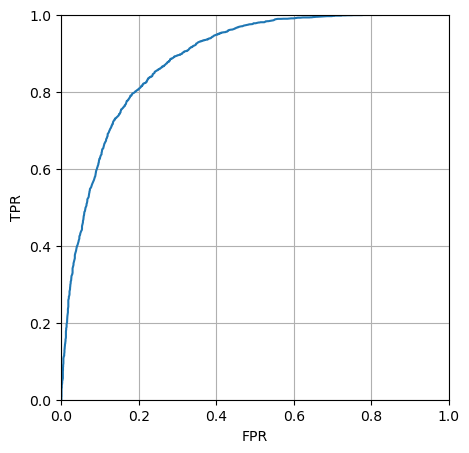

In [23]:
# GENERATE ROC CURVE
fig = plt.figure(figsize=(5,5))
ax = fig.subplots(nrows=1, ncols=1)

#for results_, label in zip([results_list[1], results_list[3]], ['Run 1', 'Run 2']) :
results_ = results_list[0]
    

thresholds = np.linspace(0,1,num=1000)  

pred = results_['PRED_MED'].values
lab = results_['LABEL'].values
tpr = np.array([np.sum(np.logical_and(pred > th, lab == 1)) for th in thresholds])/np.sum(lab)
fpr = np.array([np.sum(np.logical_and(pred > th, lab == 0)) for th in thresholds])/(len(lab) - np.sum(lab))

ax.plot(fpr, tpr)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.grid(True, zorder=1)




In [18]:
results_list[1].columns

Index(['SFID', 'SnapNum', 'Mstellar', 'MBH', 'MDM', 'Mgas', 'SFR', 'Z',
       'HMRad', 'BHacc', 'ratio_recent', 'dt_recent', 'SFID_recent',
       'snap_recent', 'ratio_biggest', 'dt_biggest', 'SFID_biggest',
       'snap_biggest', 'Redshift', 'r1', 'r1_id', 'r2', 'r2_id',
       'CircAbove07Frac', 'CircAbove07Frac_allstars',
       'CircAbove07MinusBelowNeg07Frac',
       'CircAbove07MinusBelowNeg07Frac_allstars', 'CircTwiceBelow0Frac',
       'CircTwiceBelow0Frac_allstars', 'r1_Mstellar', 'r1_HMRad', 'r_sep',
       'GAS_FRAC', 'PRED_MED', 'STD_DEV', 'LABEL', 'HMRad_prop', 'Edd_ratio',
       'Mass/radius**2', 'SFR/Mass', 'S/T', 'B/T'],
      dtype='object')

90
90
90
90
201
201
201
201
426
426
426
426
684
684
684
684
1029
1029
1029
1029
195
195
195
195
825
825
825
825
596
596
596
596


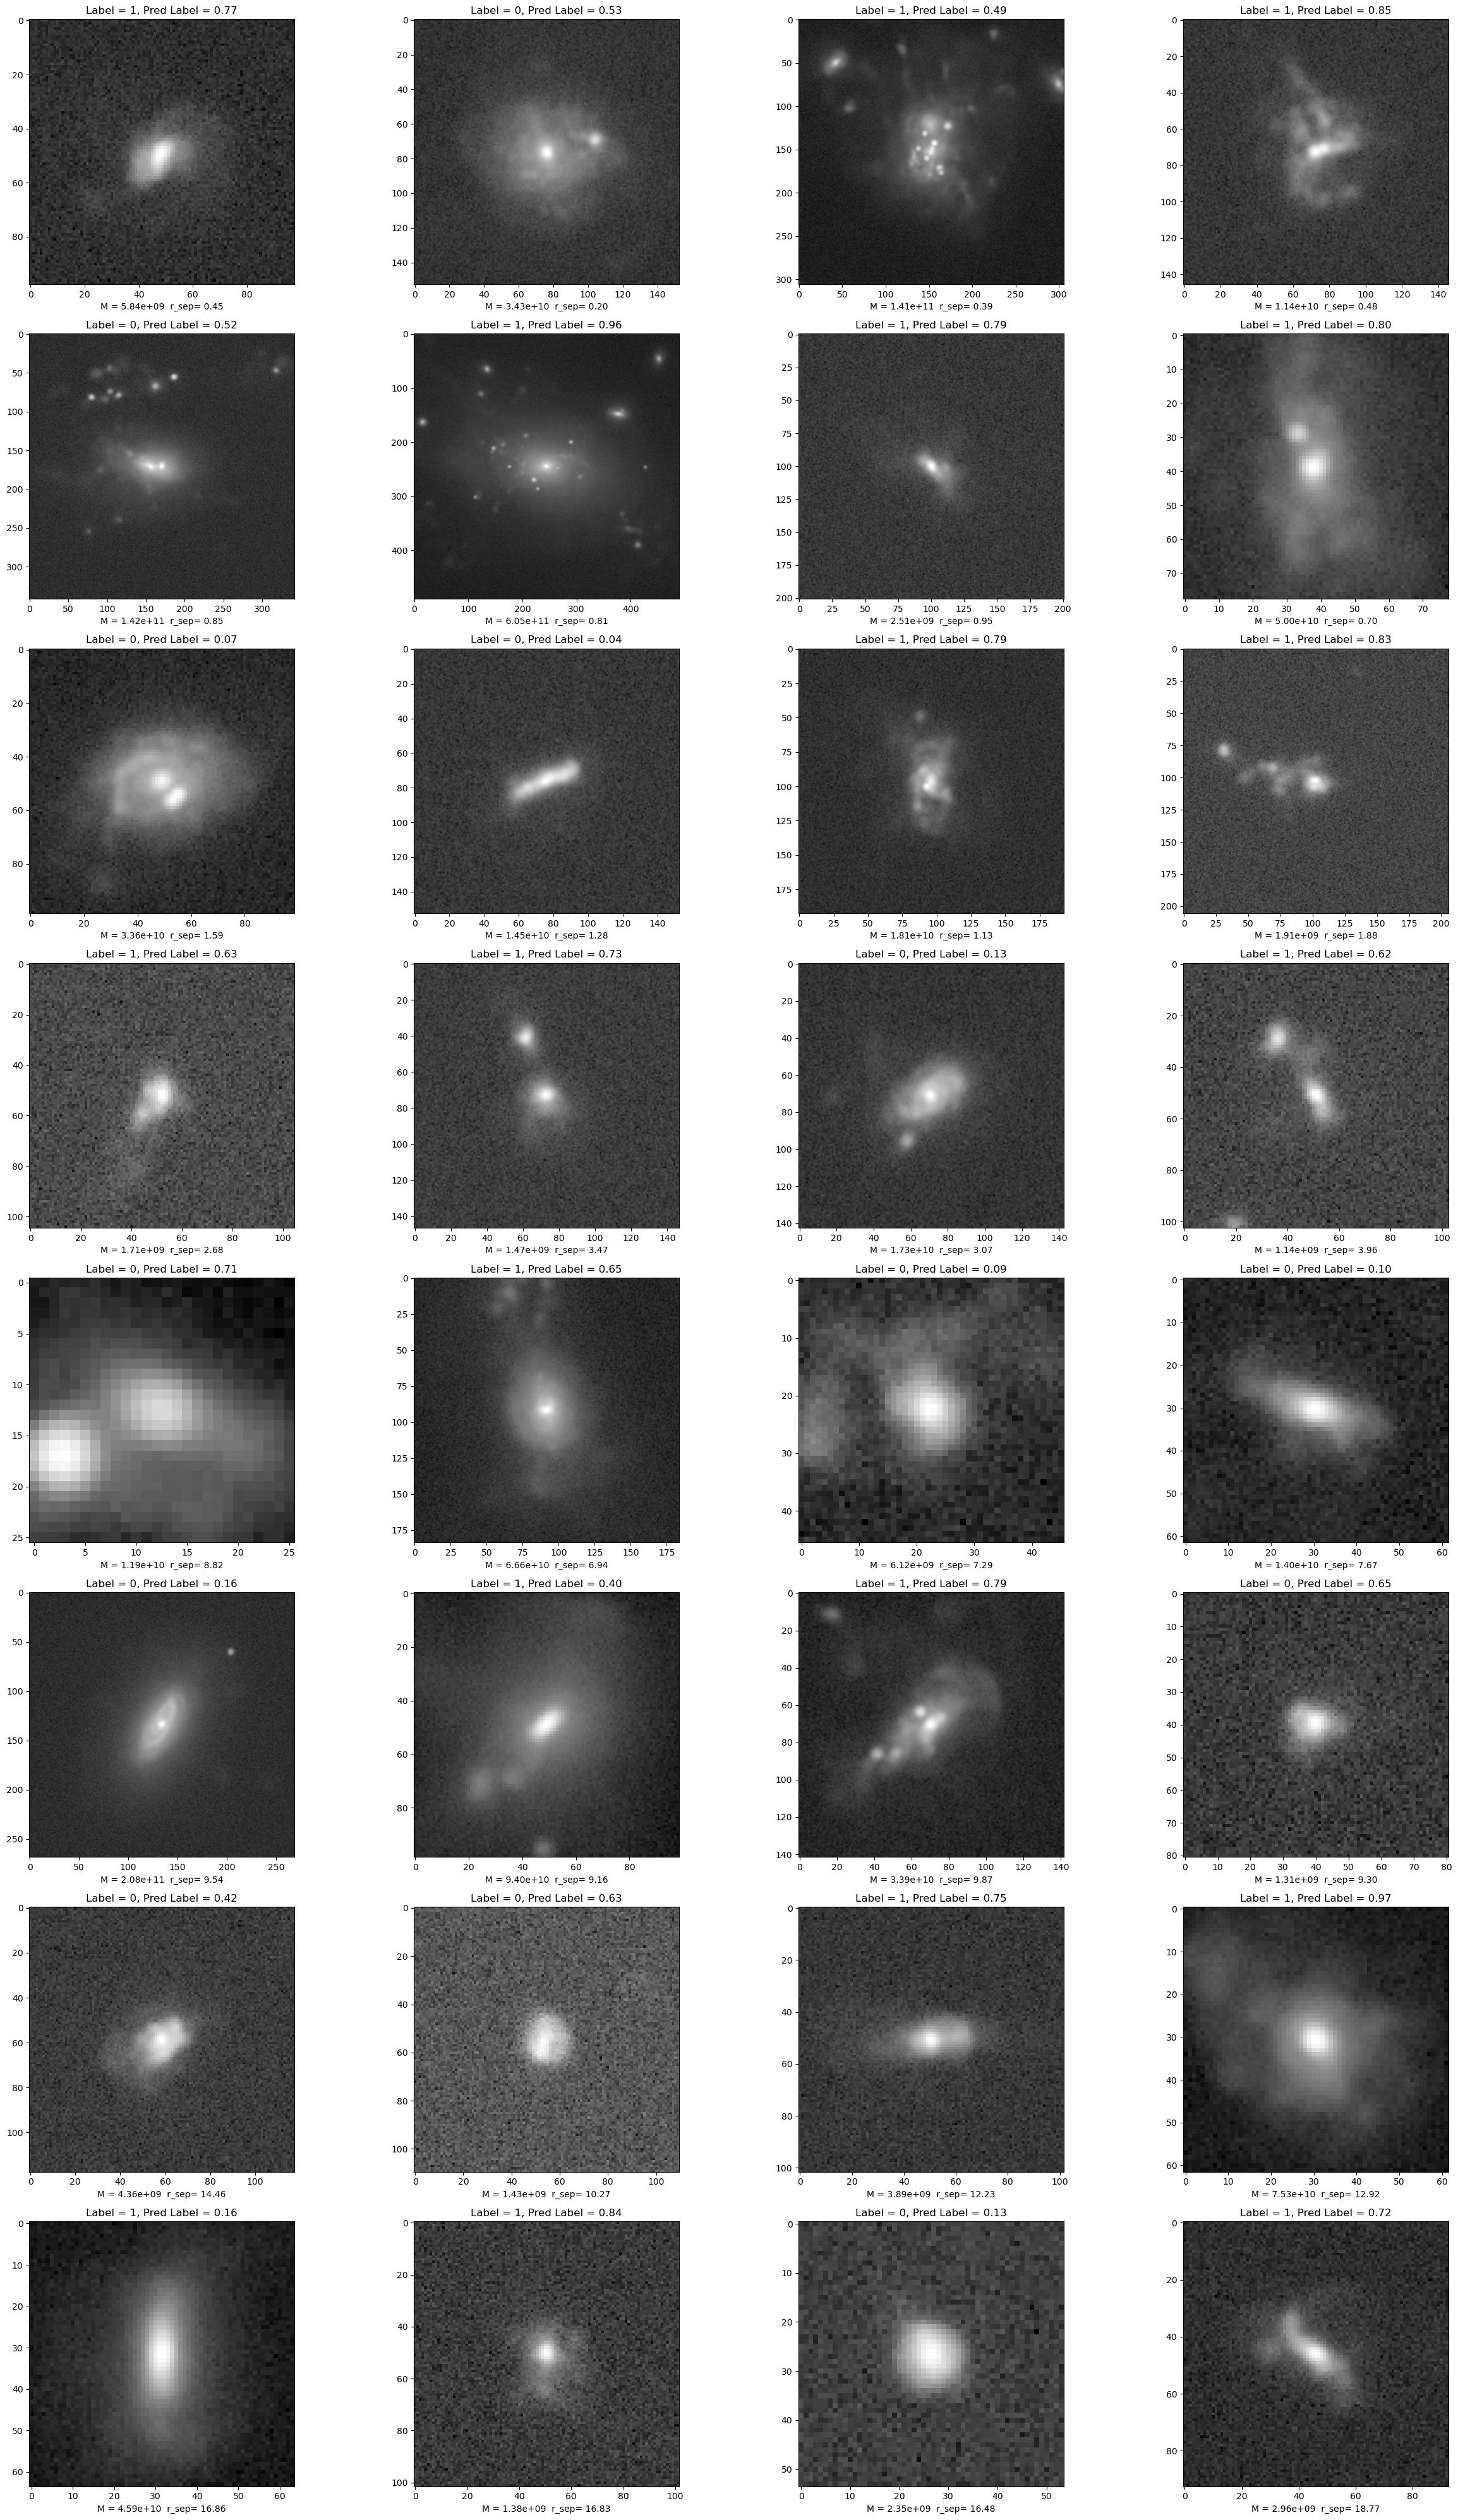

In [16]:
df = results_list[0]

#param = 'S/T'
#param_lims = [[0.3, 0.4], [0.4, 0.5], [0.5, 0.6], [0.6,0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1]]
param = 'r_sep'
param_lims= [[0, 0.5], [0.5, 1], [1, 2.5], [2.5, 5], [5, 10], [9, 10], [10, 15], [15,20]]


fig = plt.figure(figsize = (25,5 * len(param_lims)))
ax = fig.subplots(len(param_lims),4)

for j, param_lim in enumerate(param_lims):

    #for i, df in enumerate(dfs):
    for i in range(4):
        #df_filt = df.loc[(df['r_sep'] > mass_rad_lim[0]) & (df['r_sep'] < mass_rad_lim[1])].reset_index(drop = True)
        df_filt = df.loc[(df[param] > param_lim[0]) & (df[param] < param_lim[1])].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            ax[j,i].imshow(hdul[1].data[0], cmap = 'gray_r')
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_MED'][idx]))
            #ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10) + ' r_sep = %.2f' %(df_filt['r_sep'][idx]) + ' r1_mass = %.2e'%(df_filt['r1_Mstellar'][idx] * 1e10))
            ax[j,i].set_xlabel('M = %.2e  '%(df_filt['Mstellar'][idx] * 1e10) + param +  '= %.2f'%(df_filt[param][idx]))
plt.tight_layout()

In [19]:
results = results_list[0]
results
results['r_sep_v2'] = results['r1_prop']/results['HMRad_prop']
results_list[0] = results

          SFID  SnapNum  Mstellar       MBH         MDM       Mgas        SFR  \
0     210181.0     35.0  0.199075  0.000181   20.046526   2.803498   4.317021   
1      64126.0     33.0  8.166402  0.072568  221.783813  21.672148   6.546197   
2      28608.0     42.0  0.143849  0.000134    9.928973   1.380795   2.489045   
3     344540.0     41.0  0.137255  0.000203   13.320366   2.157489   1.803491   
4      97335.0     30.0  3.524554  0.014998   77.544479   8.499672  11.674804   
...        ...      ...       ...       ...         ...        ...        ...   
5884  120335.0     31.0  0.301229  0.000000   31.945217   4.652647  16.575771   
5885  294597.0     35.0  0.260770  0.000139   16.509024   2.414280   4.170868   
5886  111702.0     48.0  7.460577  0.021509  374.857544  50.903103  14.966153   
5887  178148.0     45.0  4.243521  0.014068  128.948242  18.239668  34.755367   
5888  304865.0     36.0  0.247776  0.000354   16.089903   2.458637   4.390278   

             Z      HMRad  

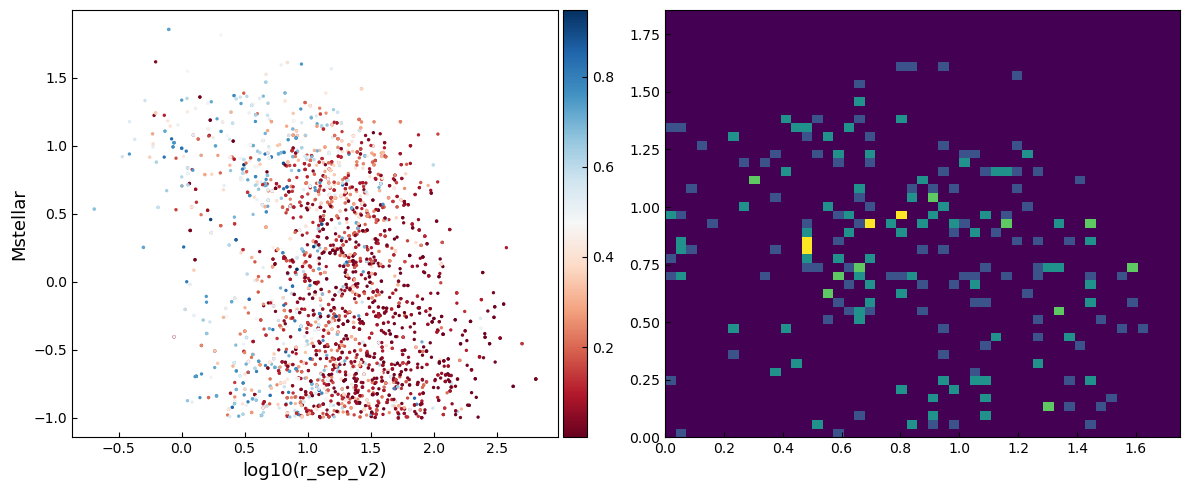

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
y_param = 'Mstellar'
x_param = 'r_sep_v2'

fig = plt.figure(figsize = (12,5))
ax = fig.subplots(len(results_list),2)

for i, results in enumerate(results_list):
    print(results)

    # controls = results.loc[(results['LABEL'] == 0) & (results['Redshift'] > 2)& (results['Redshift'] < 2.5)].reset_index(drop = True)
    FP = results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] > 0.5)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)


    # control_x = controls.loc[controls[y_param] > 0][x_param] * scale[x_param]
    control_x = np.log10(controls.loc[controls[y_param] > 0][x_param])
    #control_y = controls.loc[controls[y_param] > 0][y_param]
    control_y = np.log10(controls.loc[controls[y_param] > 0][y_param])
    plot = ax[0].scatter(control_x, control_y, s = 2, c = controls.loc[controls[y_param]>0]['PRED_MED'].values, cmap = 'RdBu')
    ax[1].hist2d(np.log10(FP[x_param]), np.log10(FP[y_param]), bins = [np.linspace(0,1.75,50), np.linspace(0,np.max(control_y),50)])
    
    
    ax[0].set_xlabel('log10(' + x_param + ')', size = 13)
    ax[0].set_ylabel(y_param, size = 13)
    if x_param == 'SFR/Mass':
        ax[0].set_xlim(-10,-8)

    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
#for axs in ax[:,0]:
    #axs.set_ylim(0,1)
    #axs.set_xlim(-.25,1.75)
plt.tight_layout()

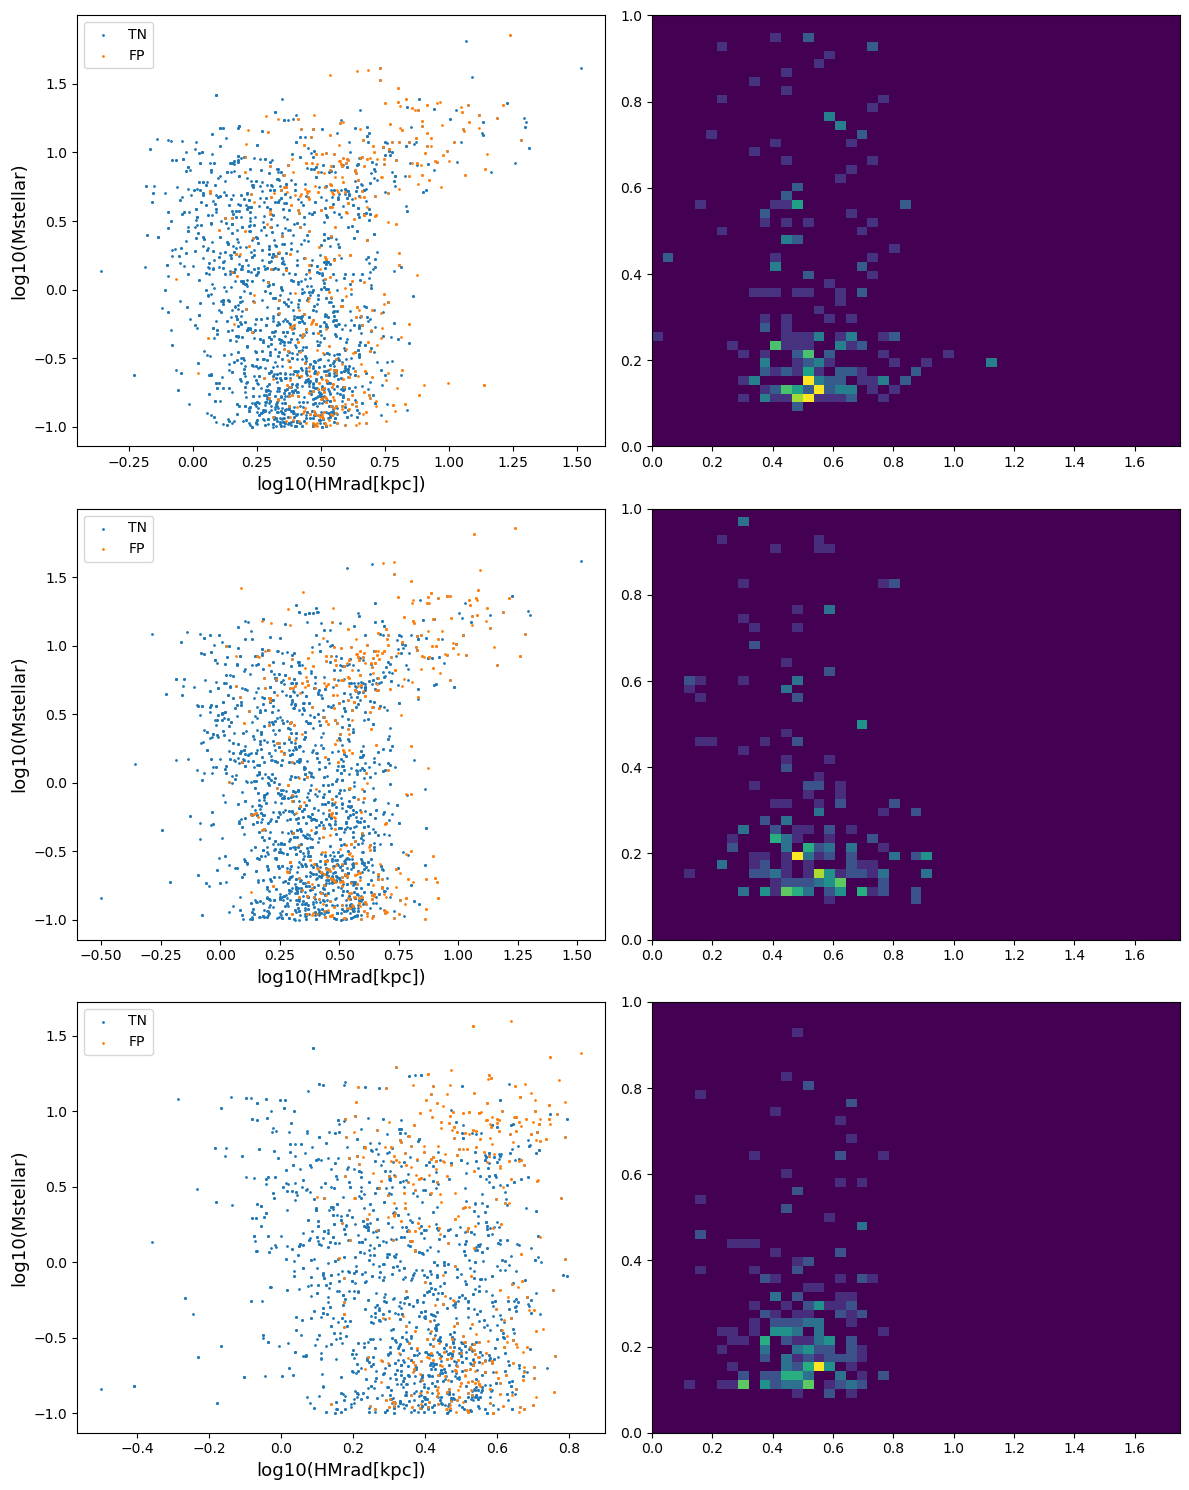

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
y_param = 'Mstellar'
x_param = 'HMRad_prop'

#results

fig = plt.figure(figsize = (12,15))
ax = fig.subplots(len(results_list),2)

for i, results in enumerate(results_list):

    # controls = results.loc[(results['LABEL'] == 0) & (results['Redshift'] > 2)& (results['Redshift'] < 2.5)].reset_index(drop = True)
    FP = results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] > 0.5)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)

    TN = controls[controls['PRED_MED'] < 0.5]
    FP = controls[controls['PRED_MED'] > 0.5]
    # control_x = controls.loc[controls[y_param] > 0][x_param] * scale[x_param]
    TN_x = np.log10(TN.loc[TN[y_param] > 0][x_param] * scale[x_param])
    #TN_y = TN.loc[TN[y_param] > 0][y_param]
    TN_y = np.log10(TN.loc[TN[y_param] > 0][y_param])
    FP_x = np.log10(FP.loc[FP[y_param] > 0][x_param] * scale[x_param])
    #FP_y = FP.loc[FP[y_param] > 0][y_param]
    FP_y = np.log10(FP.loc[FP[y_param] > 0][y_param])
    #control_y = np.log10(controls.loc[controls[y_param] > 0][y_param])
    ax[i,0].scatter(TN_x, TN_y, s = 1, label = 'TN')
    ax[i,0].scatter(FP_x, FP_y, s = 1, label = 'FP')
    ax[i,1].hist2d(np.log10(FP[x_param] * scale[x_param]), FP[y_param], bins = [np.linspace(0,1.75,50), np.linspace(0,1,50)])
    
    
    ax[i,0].set_xlabel('log10(HMrad[kpc])', size = 13)
    ax[i,0].set_ylabel('log10(Mstellar)', size = 13)
    ax[i,0].legend()
    if x_param == 'SFR/Mass':
        ax[i,0].set_xlim(-10,-8)

    #divider = make_axes_locatable(ax[i,0])
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    #fig.colorbar(plot, cax=cax, orientation='vertical')
#for axs in ax[:,0]:
    #axs.set_ylim(0,1)
    #axs.set_xlim(-.25,1.75)
plt.tight_layout()

0
0
0
0
0
0
0
0
9


NameError: name 'real_dir' is not defined

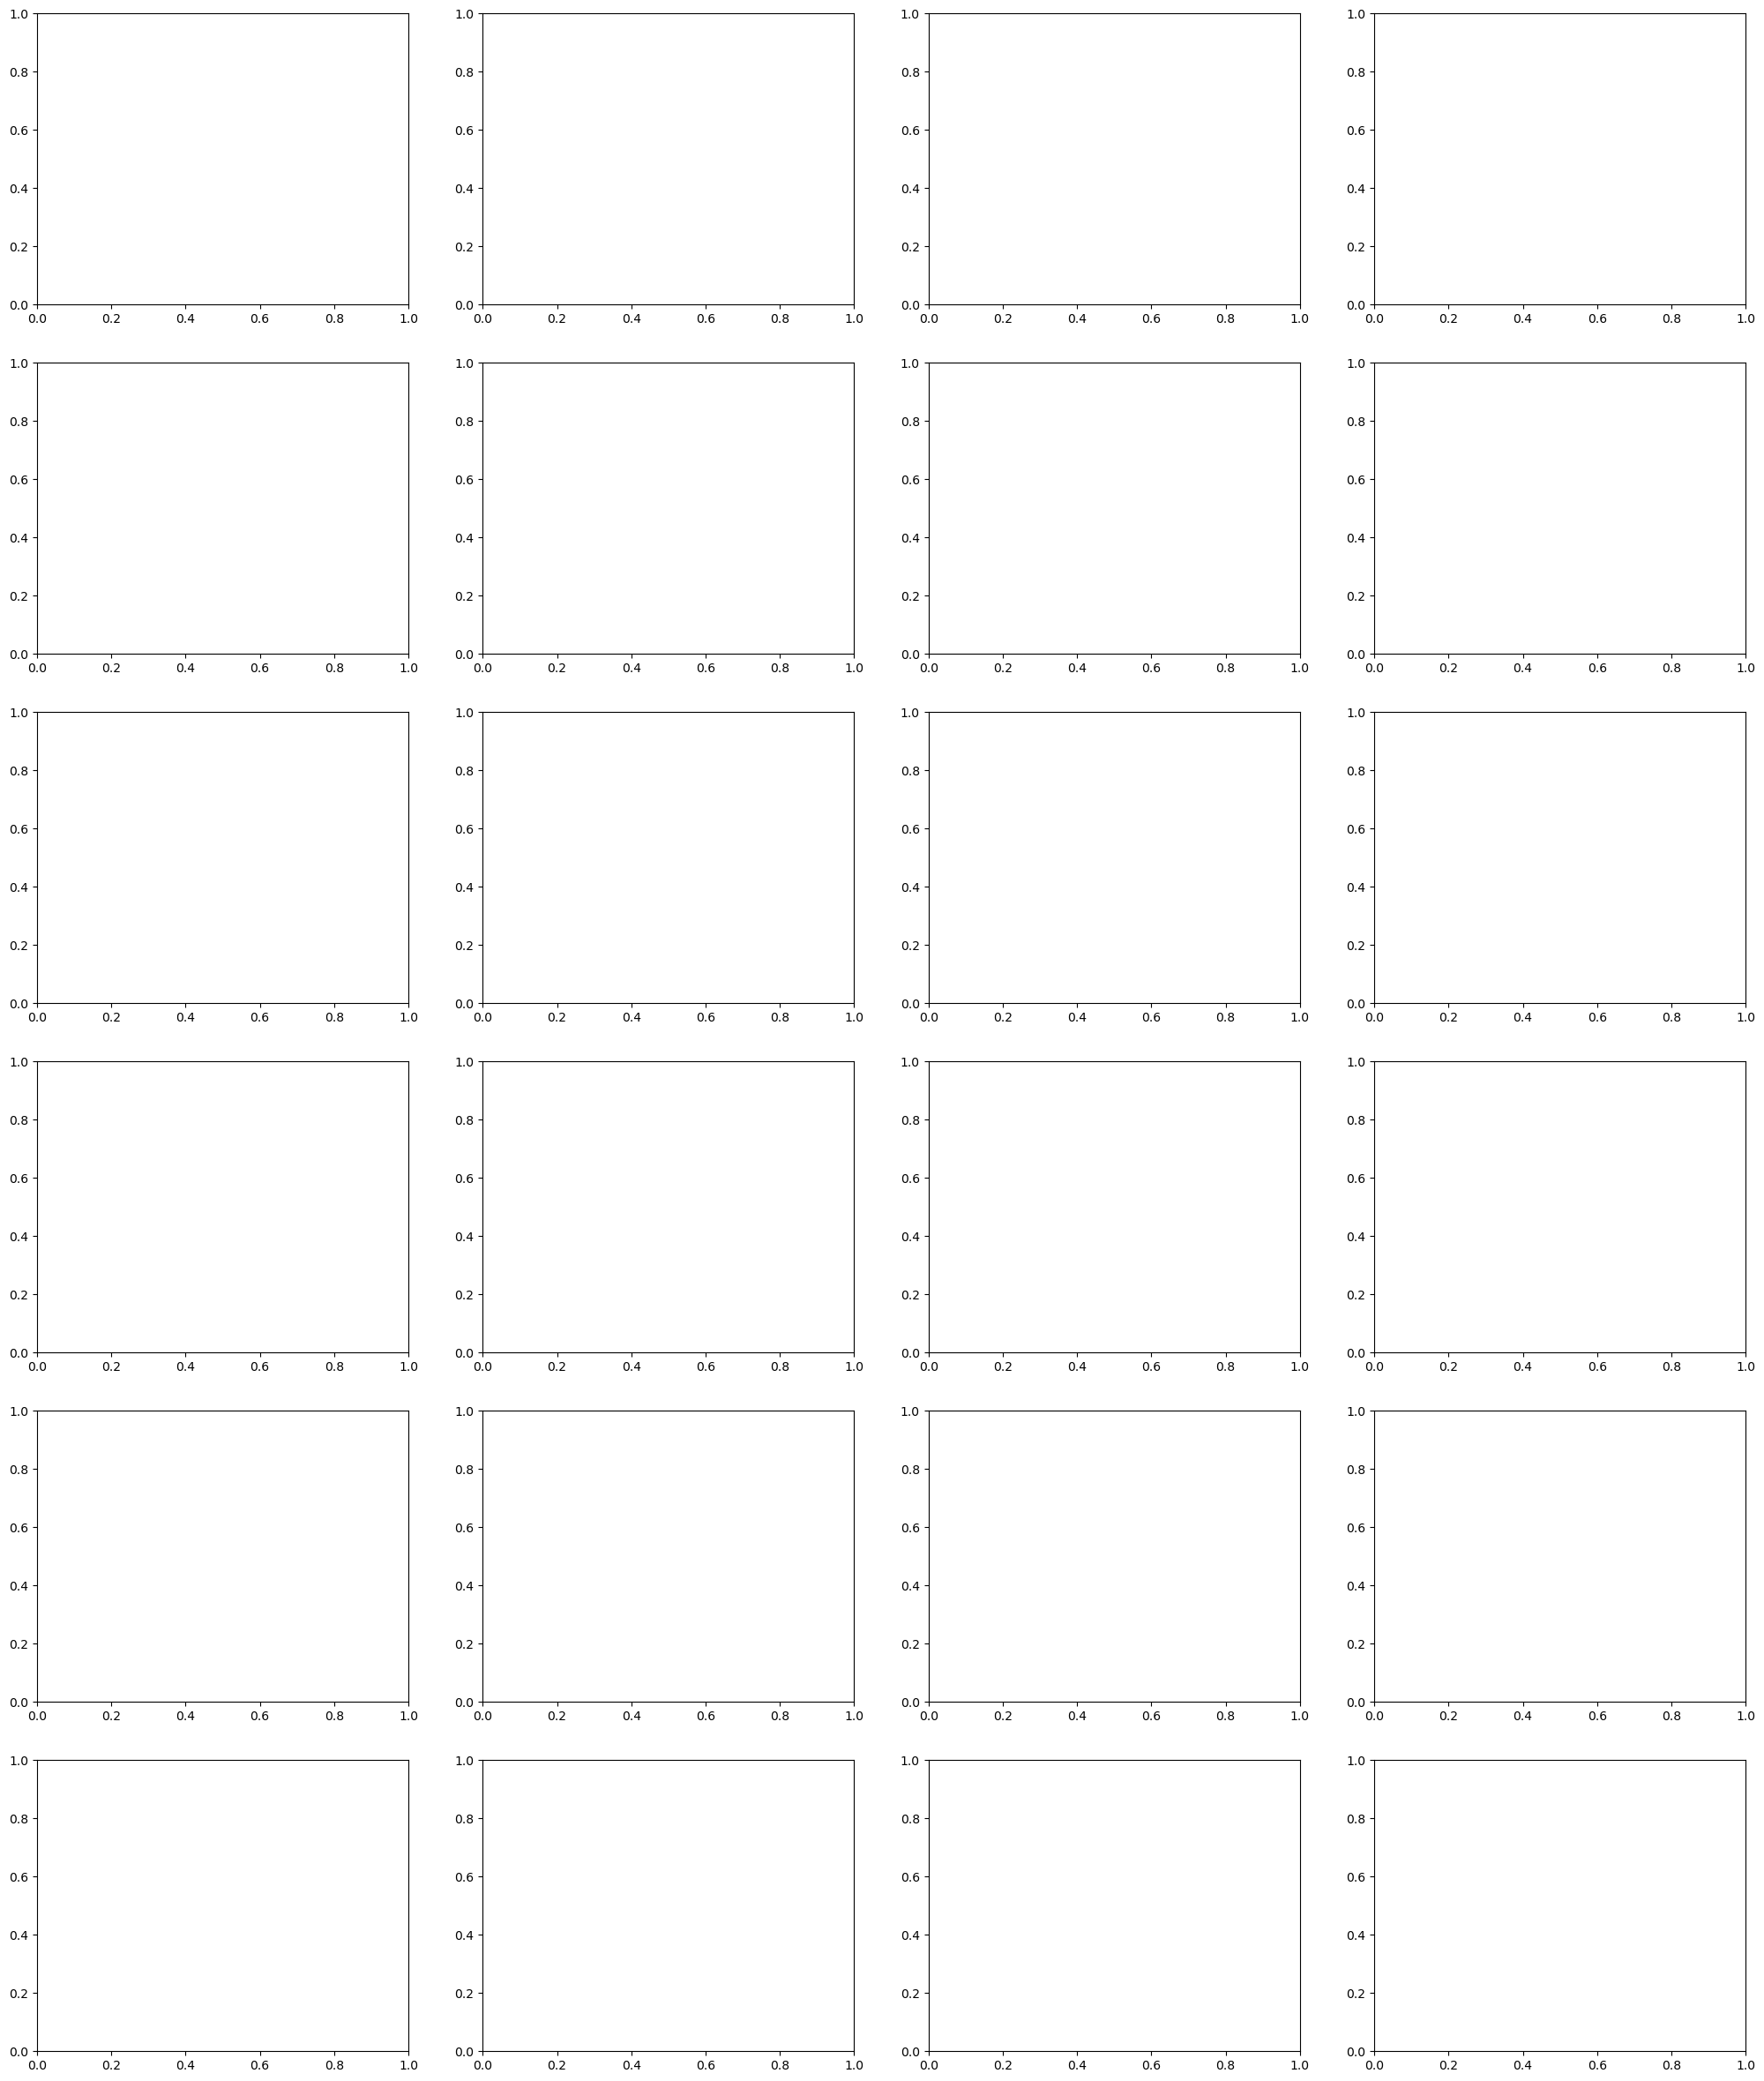

In [11]:
df = results_list[0]

#param = 'HMRad_prop'
#param_lims = [[3, 5], [5, 7], [7,9], [9, 11], [11, 13], [13, 15]]
param = 'r1_prop'
param_lims= [[0, 0.6], [0.5, 1], [1, 2.5], [2.5, 5], [5, 10], [10, 15]]


fig = plt.figure(figsize = (25,5 * len(param_lims)))
ax = fig.subplots(len(param_lims),4)

for j, param_lim in enumerate(param_lims):
    
    idx_list = []

    #for i, df in enumerate(dfs):
    for i in range(4):
        #df_filt = df.loc[(df['r_sep'] > mass_rad_lim[0]) & (df['r_sep'] < mass_rad_lim[1])].reset_index(drop = True)
        df_filt = df.loc[(df[param] > param_lim[0]) & (df[param] < param_lim[1]) & (df.LABEL == 0)].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            while idx in idx_list:
                idx = np.random.randint(0, len(df_filt))
            idx_list.append(idx)
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            ax[j,i].imshow(hdul[1].data[0], cmap = 'gray_r')
            
            size = hdul[1].data[0].shape[0]
            r = Rectangle((size/6,size/6), size * 2/3, size * 2/3, ec='r', fc='None')
            ax[j,i].add_artist(r)
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_MED'][idx]))
            #ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10) + ' r_sep = %.2f' %(df_filt['r_sep'][idx]) + ' r1_mass = %.2e'%(df_filt['r1_Mstellar'][idx] * 1e10))
            ax[j,i].set_xlabel('M = %.2e  '%(df_filt['Mstellar'][idx] * 1e10) + param +  '= %.2f'%(df_filt[param][idx]))
plt.tight_layout()

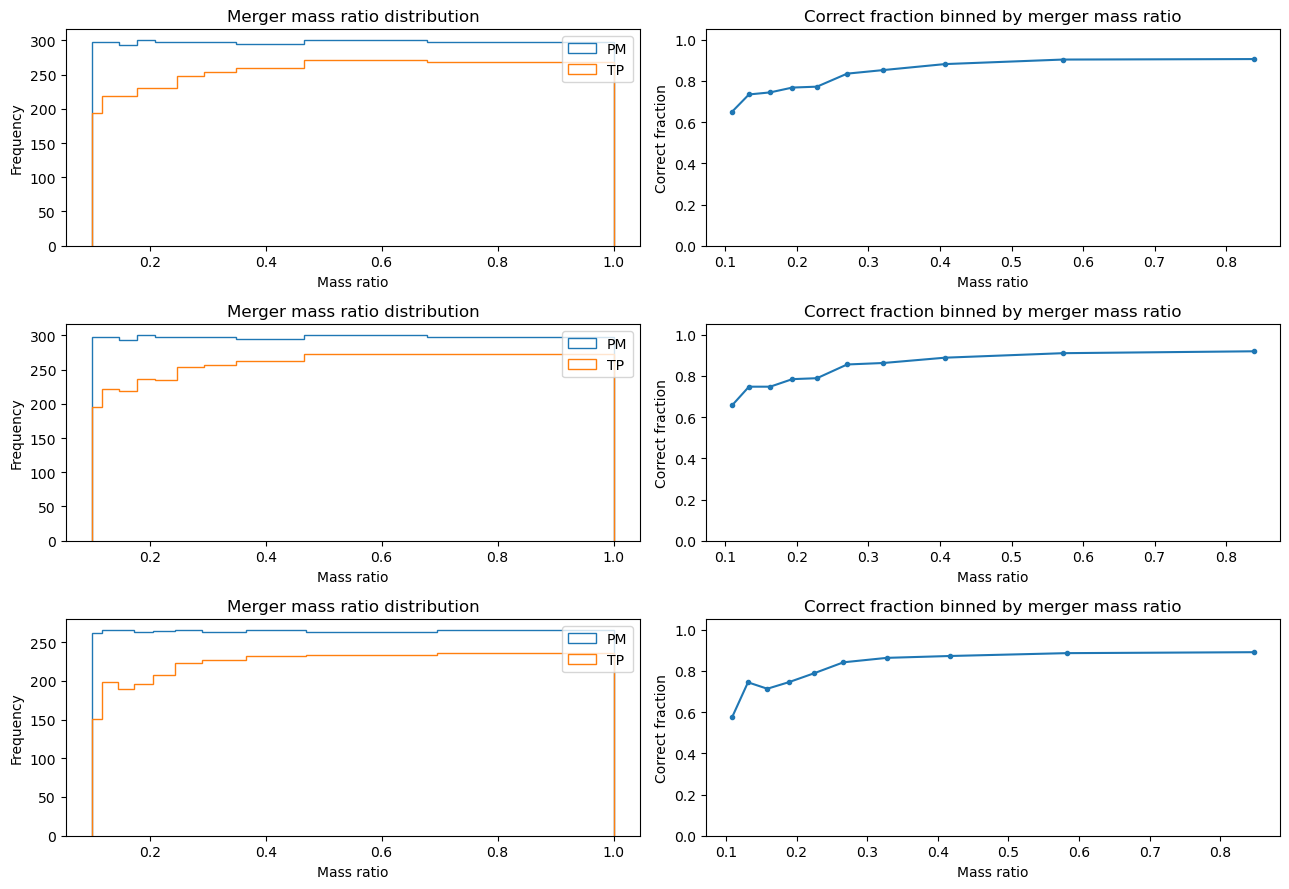

In [33]:
params = ['ratio_biggest']




for param in params:
    
    fig = plt.figure(figsize = (13,3 * len(results_list)))
    ax = fig.subplots(len(results_list),2)
    
    for i, results in enumerate(results_list):
    
        if param in no_log:
            counts_total, edges, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'PM')
            counts, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values, bins = edges, histtype = 'step', label = 'TP')

        else:
            counts_total, edges, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 1][params].values), bins = 15, histtype = 'step')
            counts, edges, bars = ax[i,0].hist(np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values), bins = 10, histtype = 'step')

        centers = 0.5*(edges[1:]+ edges[:-1])
        ax[i,1].plot(centers, counts/counts_total, '.-')    
        ax[i,1].set_ylim(0,1.05)
        ax[i,0].set_ylabel('Frequency')
        ax[i,1].set_ylabel('Correct fraction')
        ax[i,0].set_title('Merger mass ratio distribution')
        ax[i,1].set_title('Correct fraction binned by merger mass ratio')
        ax[i,0].set_xlabel('Mass ratio')
        ax[i,1].set_xlabel('Mass ratio')
        ax[i,0].legend()
    
    
#plt.hist(np.log10(false.Mstellar.values), histtype = 'step', density = True)
plt.tight_layout()

In [ ]:
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SFR/Mass' :1e-10, 'r_sep':1, 'S/T' : 1, 'B/T':1, 'HMRad_prop':1, 'r1_prop':1}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass', 'r_sep':'log10(r_sep)', 'S/T':'S/T','B/T':'B/T', 'HMRad_prop':'log10(HMRad)', 'r1_prop':1}
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(Boosting and HMrad matching)', 3: '(Boosting and HMrad matching)', 4: '(Boosting + HMrad matching + Higher M cutoff)', 5: '(Boosting + HMrad matching + Higher M cutoff)', 6: '(Boosting + HMrad matching + Higher M cutoff)'}


def plot_multi_results(results_list, params, no_log):
    
    for param in params:
        
        fig = plt.figure(figsize = (15,3 * len(results_list)))
        ax = fig.subplots(len(results_list),2)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][param].values, bins =histedges_equalN(results.loc[results['LABEL'] == 0][param].values, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values, bins = edges_NM, histtype = 'step', label = 'TN')

            else:

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values * scale[param])

                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                
                counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, histedges_equalN(results_M_total, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, histedges_equalN(results_NM_total, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[i,0].hist(results_NM, bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,0].set_title(param + ' distribution')
            ax[i,0].set_ylabel('# counts')
            ax[i,0].set_xlabel(xlabels[param])
            ax[i,0].legend()


            centers = 0.5*(edges[1:]+ edges[:-1])
            centers_NM = 0.5*(edges_NM[1:]+ edges_NM[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[i,1].errorbar(centers_NM, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            
            ax[i,1].set_ylabel('Fraction correctly identified')
            ax[i,1].set_title('Correct fraction binned by ' + param)
            ax[i,1].set_ylim(0, 1.05)
            ax[i,1].set_xlabel(xlabels[param])
            
            ax[i,1].axhline(y = 0.8, color = 'gray', linestyle='--')
            ax[i,1].legend()

        plt.tight_layout()

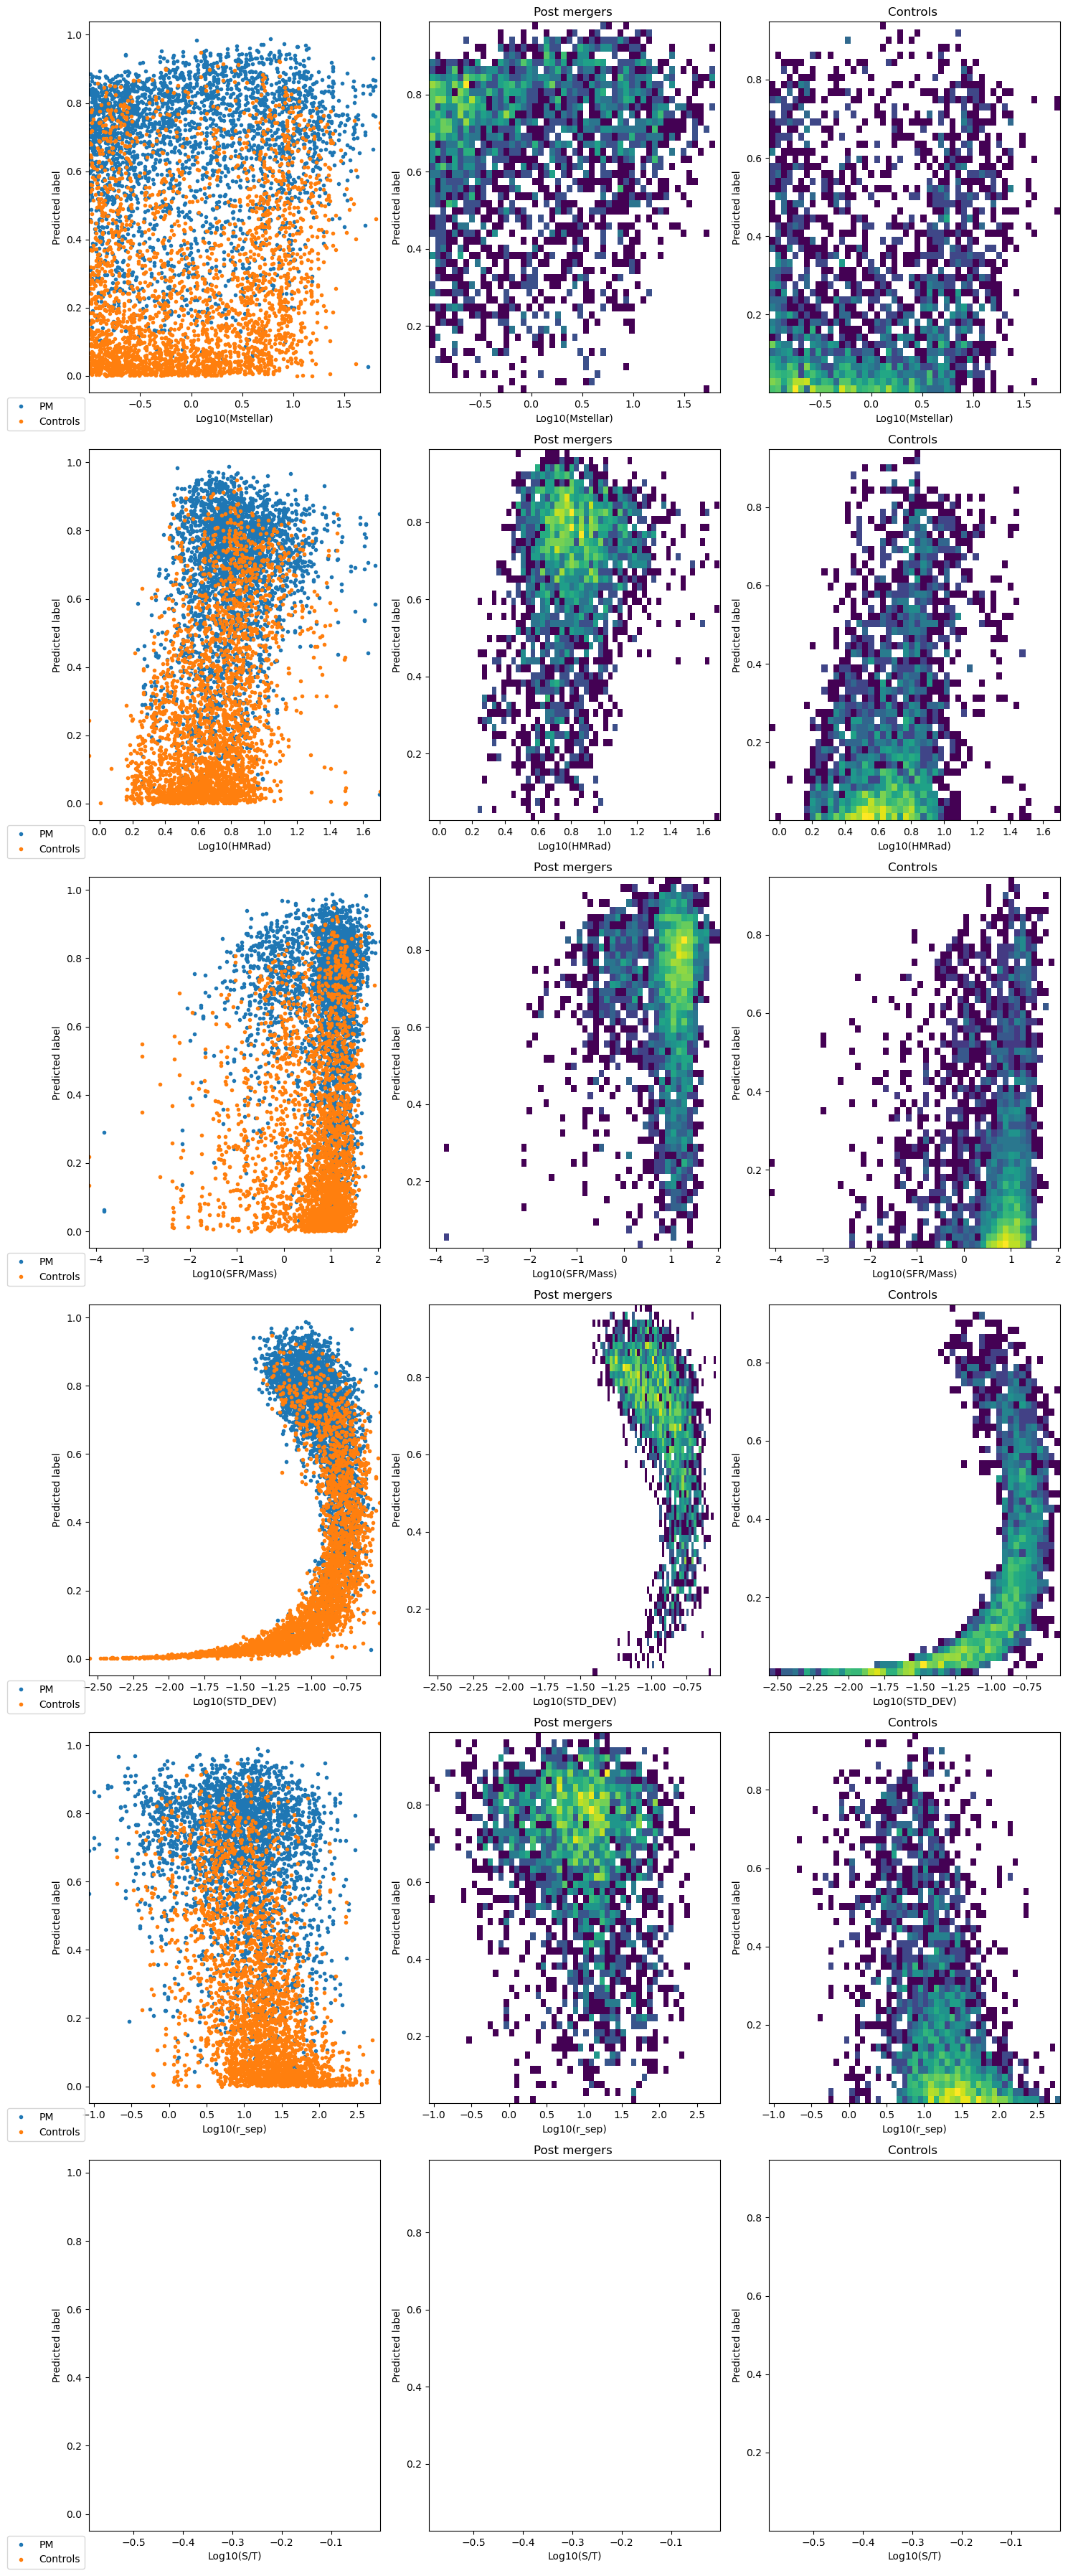

In [18]:
from matplotlib.colors import LogNorm

#results_list = [results_31, results_35, results_42]

params = ['Mstellar', 'HMRad', 'SFR/Mass', 'STD_DEV', 'r_sep', 'S/T']
results = results_list[0]
fig = plt.figure(figsize = (15, 6 * len(params)))
ax = fig.subplots(len(params), 3)
for i, param in enumerate(params):


    mergers = results.loc[(results['LABEL'] == 1)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)

    merger_labels = mergers.loc[mergers[param] > 0]['PRED_MED']
    control_labels = controls.loc[controls[param] > 0]['PRED_MED']
    merger_masses = np.log10(mergers.loc[mergers[param] > 0][param])
    control_masses = np.log10(controls.loc[controls[param] > 0][param])
    
    if param in no_log:
        merger_masses = mergers.loc[mergers[param] > 0][param]
        control_masses = controls.loc[controls[param] > 0][param]
        

   # merger_labels = mergers.loc[mergers[param] > 0]['STD_DEV']
    #control_labels = controls.loc[controls[param] > 0]['STD_DEV']
    #merger_masses = (mergers.loc[mergers[param] > 0][param])
    #control_masses = (controls.loc[controls[param] > 0][param])

    #fig = plt.figure(figsize = (15,5))
    #ax = fig.subplots(1,3)

    ax[i,0].plot(merger_masses, merger_labels, '.', label = 'PM')
    ax[i,0].plot(control_masses, control_labels, '.', label = 'Controls')
    ax[i,0].legend(bbox_to_anchor=(0, 0))
    #ax[0].set_xscale('log')

    ax[i,1].hist2d(merger_masses,merger_labels,bins=50,norm = LogNorm())
    ax[i,2].hist2d(control_masses,control_labels,bins=50,norm = LogNorm())

    ax[i,1].set_title('Post mergers ')
    ax[i,2].set_title('Controls ')

    for axs in ax[i,:]:
        axs.set_xlabel('Log10(%s)'%(param))
        axs.set_ylabel('Predicted label')
        axs.set_xlim(np.log10(np.min(results[results[param] > 0][param].values)), np.log10(np.max(results[param].values)))
fig.tight_layout()

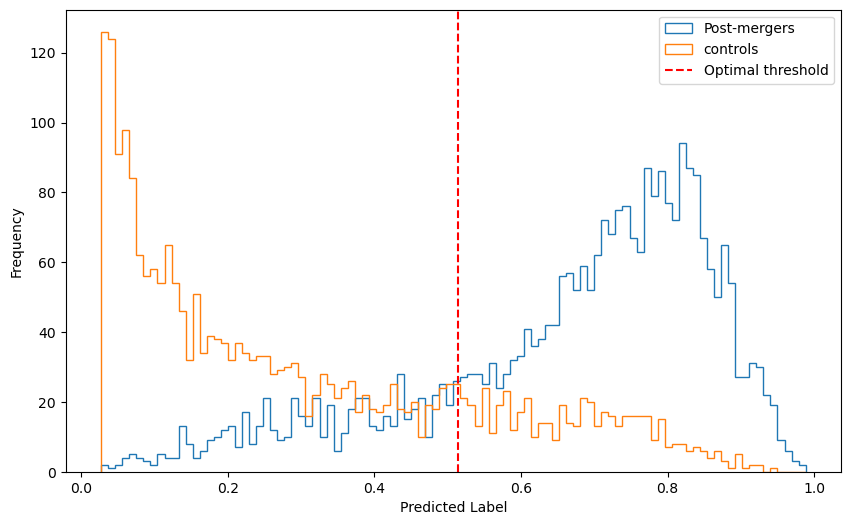

In [14]:
import matplotlib.pyplot as plt
results = results_list[0]
fig = plt.figure(figsize = (10,6 ))
ax = fig.subplots(1, 1)


counts, edges, bins = ax.hist(results.loc[results['LABEL'] == 1]['PRED_MED'], bins = 100,histtype = 'step',label = 'Post-mergers')
ax.hist(results.loc[results['LABEL'] == 0]['PRED_MED'], bins = edges,histtype = 'step', label = 'controls')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Frequency')
ax.axvline(x = 0.5145145145145145, color = 'red', linestyle='--', label = 'Optimal threshold')
ax.legend()